# **Exploratory Data Analysis**

In this notebook we get to work with the cleaned dataset from the previous notebook.

In this we will perform the task of exploratory data analysis. We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = "C:\\Users\\Akshay\\Documents\\Data Analyst\\Developer project 1\\Cleaned_Data.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Country,Age,Gender,Accessibility,MentalHealth,MainBranch,Employment,EdLevel,Age1stCode,...,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NormalizedAnnualCompensation
0,0,Slovakia,25-34 years old,Man,None of the above,None of the above,I am a developer by profession,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...",18 - 24 years,...,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,57600.0
1,1,Netherlands,18-24 years old,Man,None of the above,None of the above,I am a student who is learning to code,"Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,...,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,NaN
2,2,Russian Federation,18-24 years old,Man,None of the above,None of the above,"I am not primarily a developer, but I write co...","Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,...,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,NaN
3,3,Austria,35-44 years old,Man,I am deaf / hard of hearing,NaN,I am a developer by profession,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,...,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,NaN
4,4,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,None of the above,NaN,I am a developer by profession,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,...,Flask,Apache Spark;Hadoop;NumPy;Pandas,Hadoop;NumPy;Pandas,Docker;Git;Kubernetes;Yarn,Docker;Git;Kubernetes;Yarn,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...,Linux-based,Visit Stack Overflow;Go for a walk or other ph...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    83439 non-null  int64  
 1   Country                       83439 non-null  object 
 2   Age                           82222 non-null  object 
 3   Gender                        83439 non-null  object 
 4   Accessibility                 76481 non-null  object 
 5   MentalHealth                  75786 non-null  object 
 6   MainBranch                    82222 non-null  object 
 7   Employment                    83439 non-null  object 
 8   EdLevel                       83439 non-null  object 
 9   Age1stCode                    83439 non-null  object 
 10  DevType                       65661 non-null  object 
 11  CompTotal                     46647 non-null  float64
 12  CompFreq                      51540 non-null  object 
 13  L

Find total number of different countries.

In [5]:
df["Country"].nunique()

180

We can identify the countries with the highest number of respondents using the value_counts method.

In [6]:
top_countries = df[["Country"]].value_counts().head(10)
top_countries

Country                                             
United States of America                                16176
India                                                   10452
Germany                                                  5544
United Kingdom of Great Britain and Northern Ireland     4427
Canada                                                   2970
France                                                   2661
Brazil                                                   2224
Poland                                                   1771
Netherlands                                              1748
Italy                                                    1654
dtype: int64

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.size'] = 14

We can visualize this information using a bar chart.

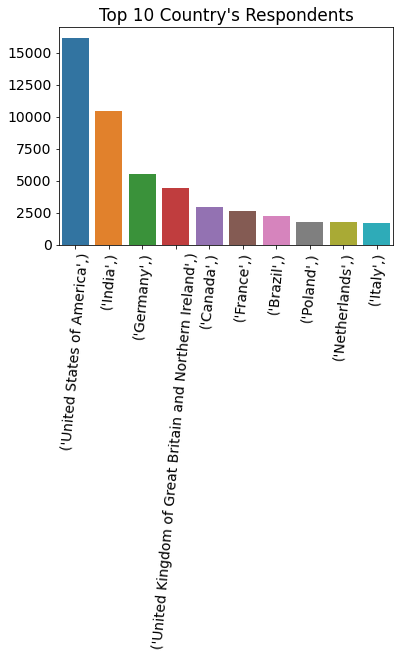

In [8]:
x = top_countries.index
y = top_countries
sns.barplot(x,y)
plt.title("Top 10 Country's Respondents")
plt.xticks(rotation=85);

Let's Analyze demographic information

In [9]:
df[['Age',"Gender"]].sample(10)

,Age,Gender
23197,18-24 years old,Man
50015,35-44 years old,Man
20819,35-44 years old,Man
16605,25-34 years old,Man
75016,25-34 years old,Man
74410,25-34 years old,Man
82757,25-34 years old,Woman
59013,35-44 years old,Man
22496,25-34 years old,Man
43616,35-44 years old,Man


In [10]:
df_age = df[["Age"]].value_counts().copy()
df_age

Age               
25-34 years old       33170
18-24 years old       20686
35-44 years old       15016
45-54 years old        5407
Under 18 years old     5218
55-64 years old        1786
Prefer not to say       536
65 years or older       403
dtype: int64

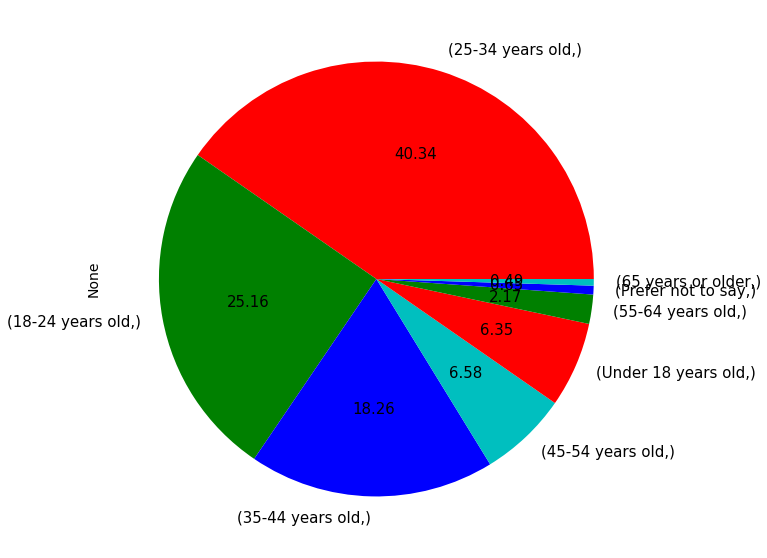

In [11]:
df_age.plot.pie(colors=["r", "g", "b", "c"],
                   autopct="%.2f",
                   fontsize=15,
                   figsize=(10, 10)
                  );

In [12]:
df_gender = df[["Gender"]].value_counts().copy()
df_gender

Gender                                           
Man                                                  77187
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
dtype: int64

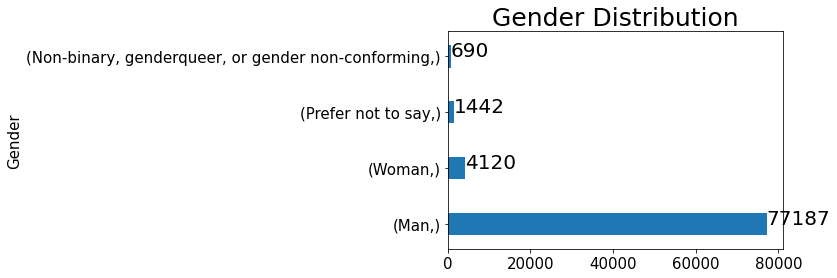

In [13]:
df_gender.plot(kind="barh",fontsize=15,width=0.4)
plt.title("Gender Distribution",fontsize=25)
plt.ylabel("Gender",fontsize=15)

for index,value in enumerate(df_gender):
    plt.text(value,index,str(value),fontsize=20)

In [14]:
df[["MainBranch"]].value_counts()

MainBranch                                                                   
I am a developer by profession                                                   57432
I am a student who is learning to code                                           11824
I am not primarily a developer, but I write code sometimes as part of my work     6498
I code primarily as a hobby                                                       4768
I used to be a developer by profession, but no longer am                          1212
None of these                                                                      488
dtype: int64

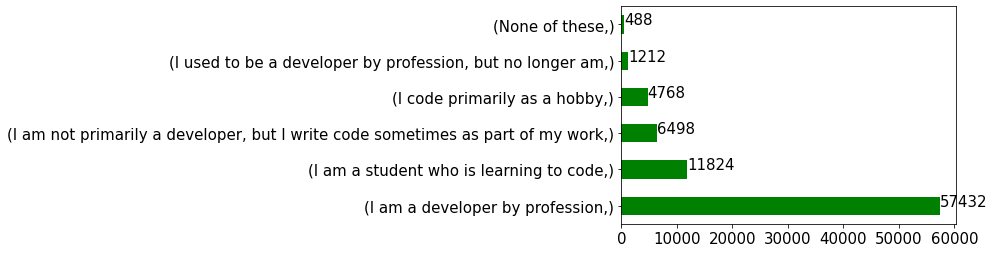

In [15]:
df[["MainBranch"]].value_counts().plot(kind="barh",color="green",fontsize=15)
plt.ylabel(None)
for index,value in enumerate(df[["MainBranch"]].value_counts()):
    plt.text(value,index,str(value),fontsize=15);

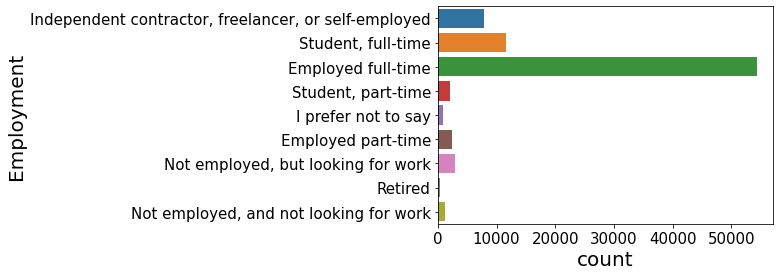

In [16]:
sns.countplot(y=df.Employment)
plt.xticks(fontsize=15);
plt.ylabel("Employment",fontsize=20);
plt.xlabel("count",fontsize=20);
plt.yticks(fontsize=15);

Let's also plot *EdLevel*, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [17]:
EdLevel_pct = df.EdLevel.value_counts()*100/df.EdLevel.count()
EdLevel_pct

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          43.732547
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20.785244
Some college/university study without earning a degree                                12.427043
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    11.206990
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.039346
Primary/elementary school                                                              2.847589
Associate degree (A.A., A.S., etc.)                                                    2.630664
Something else                                                                         1.844461
Professional degree (JD, MD, etc.)                                                     1.486116
Name: EdLevel, dtype: float64

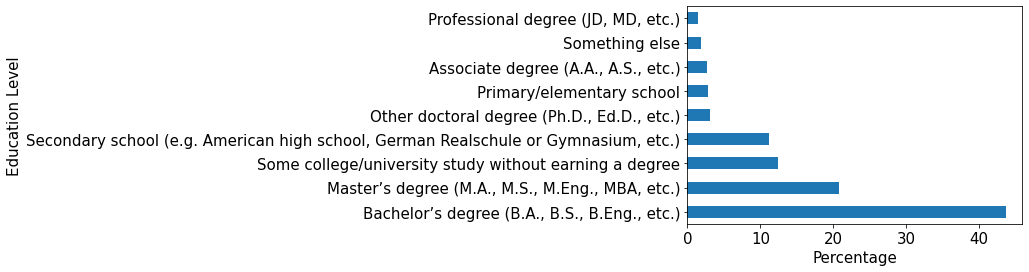

In [18]:
EdLevel_pct.plot(kind="barh");
plt.xlabel("Percentage",fontsize=15);
plt.ylabel("Education Level",fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

We can observe categorical data using *value_counts()*

In [19]:
df[["Age1stCode"]].value_counts()

Age1stCode          
11 - 17 years           44974
18 - 24 years           19872
5 - 10 years            11441
25 - 34 years            4150
35 - 44 years            1299
Younger than 5 years      856
45 - 54 years             540
55 - 64 years             237
Older than 64 years        70
dtype: int64

Find the respondents who wrote their 1st code when they was younger than 5 years and what are they doing now?

In [20]:
Code_before_5 = df[df["Age1stCode"].str.contains("Younger than 5 years")].copy()
Code_before_5[["MainBranch"]].value_counts()

MainBranch                                                                   
I am a developer by profession                                                   474
I am a student who is learning to code                                           196
I code primarily as a hobby                                                       87
I am not primarily a developer, but I write code sometimes as part of my work     64
I used to be a developer by profession, but no longer am                          18
None of these                                                                     17
dtype: int64

As we can see most of them are developer now.

In [21]:
df[["DevType"]].value_counts()

DevType                                                                                                                                                       
Developer, full-stack                                                                                                                                             8517
Developer, back-end                                                                                                                                               5418
Developer, front-end                                                                                                                                              2384
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                    2122
Developer, full-stack;Developer, back-end                                                                                                                         1756
      

What are the most popular programming languages in 2021?

In [22]:
df["LanguageHaveWorkedWith"].value_counts()

Python                                                 1318
HTML/CSS;JavaScript;Node.js;TypeScript                  806
Java                                                    706
HTML/CSS;JavaScript;PHP;SQL                             667
C#                                                      589
                                                       ... 
C;C#;HTML/CSS;JavaScript;PHP;Python;Rust;TypeScript       1
C#;Java;JavaScript;Node.js;PHP;TypeScript                 1
C#;HTML/CSS;Java;Node.js;PowerShell                       1
C#;C++;JavaScript;Node.js;PowerShell;Python;SQL           1
Delphi;Elixir;HTML/CSS;Java;JavaScript                    1
Name: LanguageHaveWorkedWith, Length: 28281, dtype: int64

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [23]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []

    for index, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[index, option] = True
    return result_df[options]

In [24]:
Language_worked_df = split_multicolumn(df.LanguageHaveWorkedWith)
Language_worked_df

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Clojure,APL,LISP,F#,Groovy,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
for column in Language_worked_df.columns.values.tolist():
        print(column)
        print (Language_worked_df[column].value_counts())
        print("")

C++
False    63758
True     19681
Name: C++, dtype: int64

HTML/CSS
True     45547
False    37892
Name: HTML/CSS, dtype: int64

JavaScript
True     52818
False    30621
Name: JavaScript, dtype: int64

Objective-C
False    81177
True      2262
Name: Objective-C, dtype: int64

PHP
False    65574
True     17865
Name: PHP, dtype: int64

Swift
False    79307
True      4132
Name: Swift, dtype: int64

Python
False    44282
True     39157
Name: Python, dtype: int64

Assembly
False    78965
True      4474
Name: Assembly, dtype: int64

C
False    66437
True     17002
Name: C, dtype: int64

R
False    79325
True      4114
Name: R, dtype: int64

Rust
False    77799
True      5640
Name: Rust, dtype: int64

TypeScript
False    58869
True     24570
Name: TypeScript, dtype: int64

Bash/Shell
False    61514
True     21925
Name: Bash/Shell, dtype: int64

SQL
False    45139
True     38300
Name: SQL, dtype: int64

C#
False    60816
True     22623
Name: C#, dtype: int64

Java
False    54690
True     28749


Programming languages.....

In [26]:
df_top5_language = Language_worked_df.sum().sort_values(ascending=False)
df_top5_language

JavaScript     52818
HTML/CSS       45547
Python         39157
SQL            38300
Java           28749
Node.js        27564
TypeScript     24570
C#             22623
Bash/Shell     21925
C++            19681
PHP            17865
C              17002
PowerShell      8679
Go              7754
Kotlin          6766
Rust            5640
Ruby            5463
Dart            4903
Assembly        4474
Swift           4132
R               4114
Matlab          3779
VBA             3773
Groovy          2436
Objective-C     2262
Scala           2105
Perl            1968
Haskell         1694
Delphi          1692
Clojure         1522
Elixir          1401
LISP            1049
Julia           1035
F#               772
Erlang           623
APL              503
Crystal          445
COBOL            416
dtype: int64

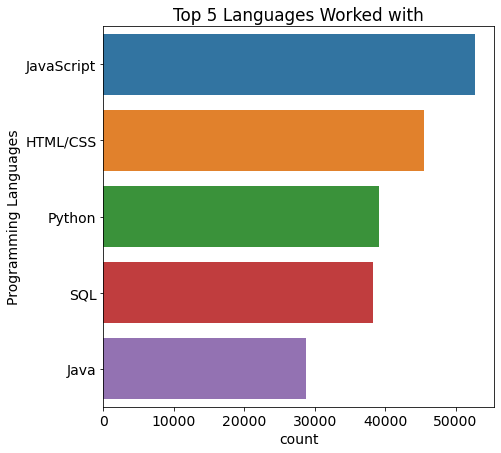

In [27]:
plt.figure(figsize=(7, 7))
sns.barplot(x=df_top5_language[:5], y=df_top5_language[:5].index)
plt.title("Top 5 Languages Worked with");
plt.ylabel("Programming Languages");
plt.xlabel('count');

It appears that a total of 38 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [28]:
pct_Language_worked_df = Language_worked_df.mean().sort_values(ascending=False)*100
pct_Language_worked_df

JavaScript     63.301334
HTML/CSS       54.587183
Python         46.928894
SQL            45.901797
Java           34.455111
Node.js        33.034912
TypeScript     29.446662
C#             27.113220
Bash/Shell     26.276681
C++            23.587291
PHP            21.410851
C              20.376563
PowerShell     10.401611
Go              9.293016
Kotlin          8.108918
Rust            6.759429
Ruby            6.547298
Dart            5.876149
Assembly        5.362001
Swift           4.952121
R               4.930548
Matlab          4.529057
VBA             4.521866
Groovy          2.919498
Objective-C     2.710962
Scala           2.522801
Perl            2.358609
Haskell         2.030226
Delphi          2.027829
Clojure         1.824087
Elixir          1.679071
LISP            1.257206
Julia           1.240427
F#              0.925227
Erlang          0.746653
APL             0.602836
Crystal         0.533324
COBOL           0.498568
dtype: float64

We can plot this information using a horizontal bar chart.

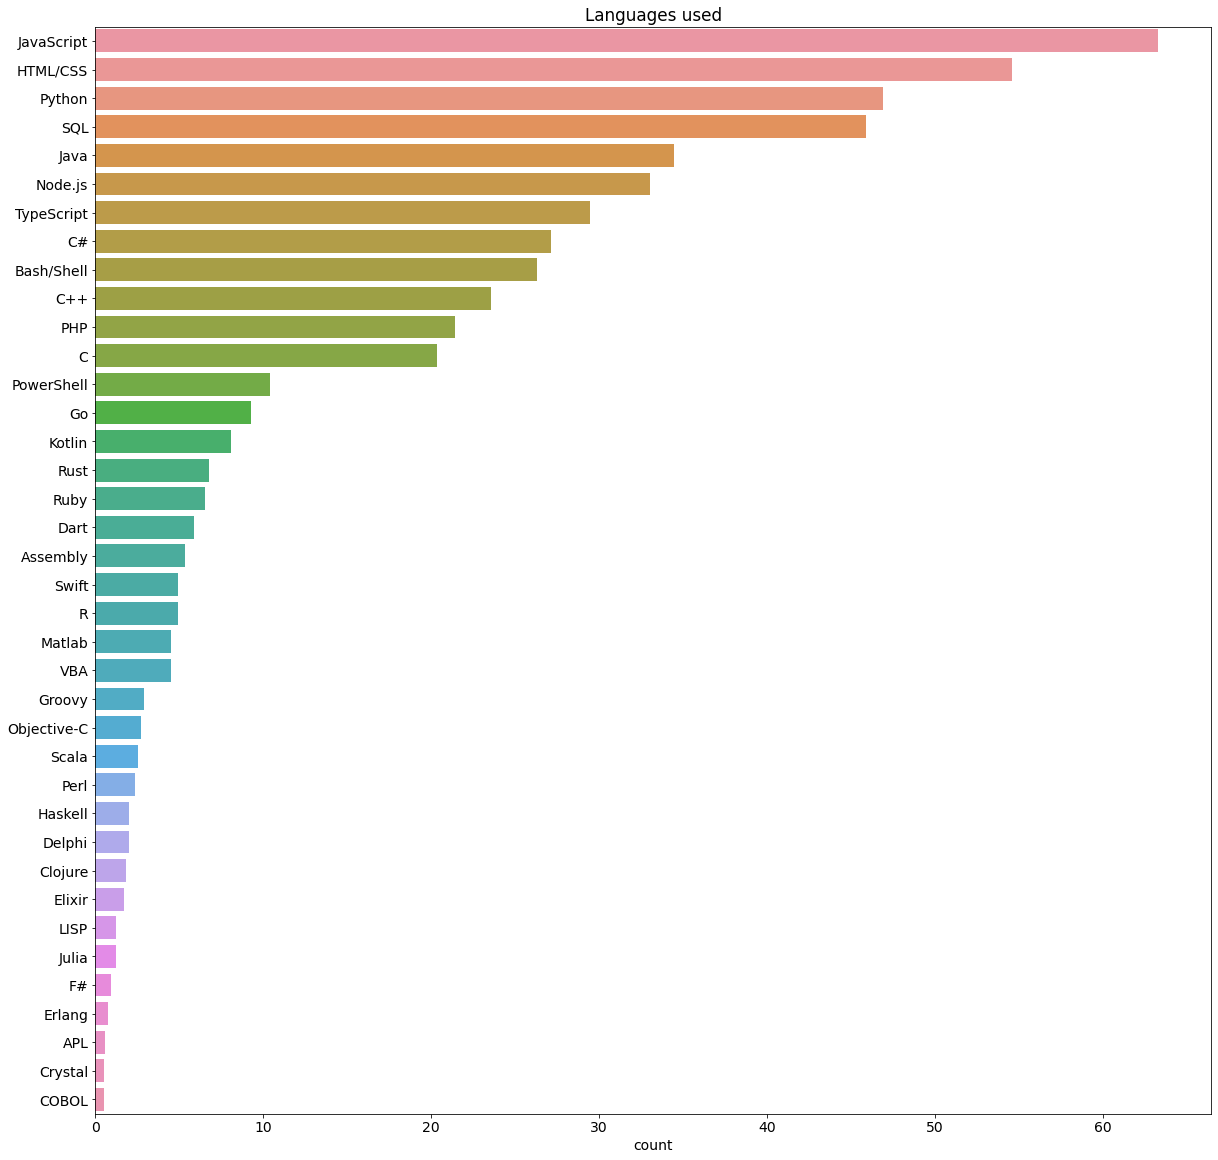

In [29]:
plt.figure(figsize=(20, 20))
sns.barplot(x=pct_Language_worked_df, y=pct_Language_worked_df.index)
plt.title("Languages used");
plt.xlabel('count');


Which languages are the most people interested to learn over the next year?

In [30]:
languages_interested_df = split_multicolumn(df.LanguageWantToWorkWith)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

JavaScript     43.745730
Python         41.224128
HTML/CSS       34.640875
TypeScript     31.849615
SQL            31.468498
Node.js        28.522633
C#             21.225087
Java           20.328623
Go             18.675919
Rust           18.666331
C++            17.893311
Bash/Shell     16.480303
Kotlin         12.630784
C              11.323242
PHP            10.426779
Dart            8.310263
Swift           7.495296
Ruby            5.810233
PowerShell      5.737125
R               4.724409
Assembly        4.111986
Haskell         4.023298
Elixir          3.974161
Scala           3.735663
Julia           2.887139
Clojure         2.840398
F#              2.519206
Matlab          1.826484
LISP            1.733003
Objective-C     1.635926
Erlang          1.605964
Groovy          1.378252
Perl            1.359077
VBA             1.245221
Delphi          1.137358
Crystal         0.912044
APL             0.647179
COBOL           0.345162
dtype: float64

In [31]:
df_top5_language_learn = languages_interested_df.sum().sort_values(ascending=False)
df_top5_language_learn

JavaScript     36501
Python         34397
HTML/CSS       28904
TypeScript     26575
SQL            26257
Node.js        23799
C#             17710
Java           16962
Go             15583
Rust           15575
C++            14930
Bash/Shell     13751
Kotlin         10539
C               9448
PHP             8700
Dart            6934
Swift           6254
Ruby            4848
PowerShell      4787
R               3942
Assembly        3431
Haskell         3357
Elixir          3316
Scala           3117
Julia           2409
Clojure         2370
F#              2102
Matlab          1524
LISP            1446
Objective-C     1365
Erlang          1340
Groovy          1150
Perl            1134
VBA             1039
Delphi           949
Crystal          761
APL              540
COBOL            288
dtype: int64

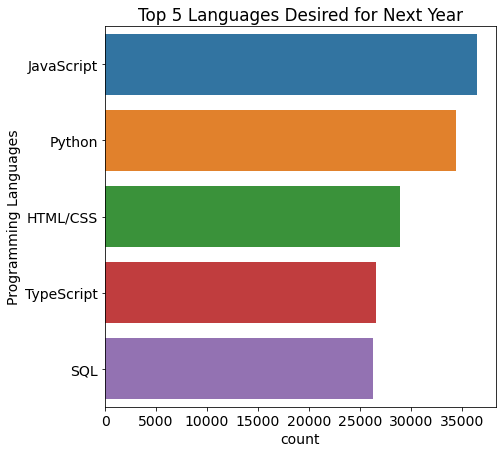

In [32]:
plt.figure(figsize=(7, 7))
sns.barplot(x=df_top5_language_learn[:5], y=df_top5_language_learn[:5].index)
plt.title("Top 5 Languages Desired for Next Year");
plt.ylabel("Programming Languages");
plt.xlabel('count');

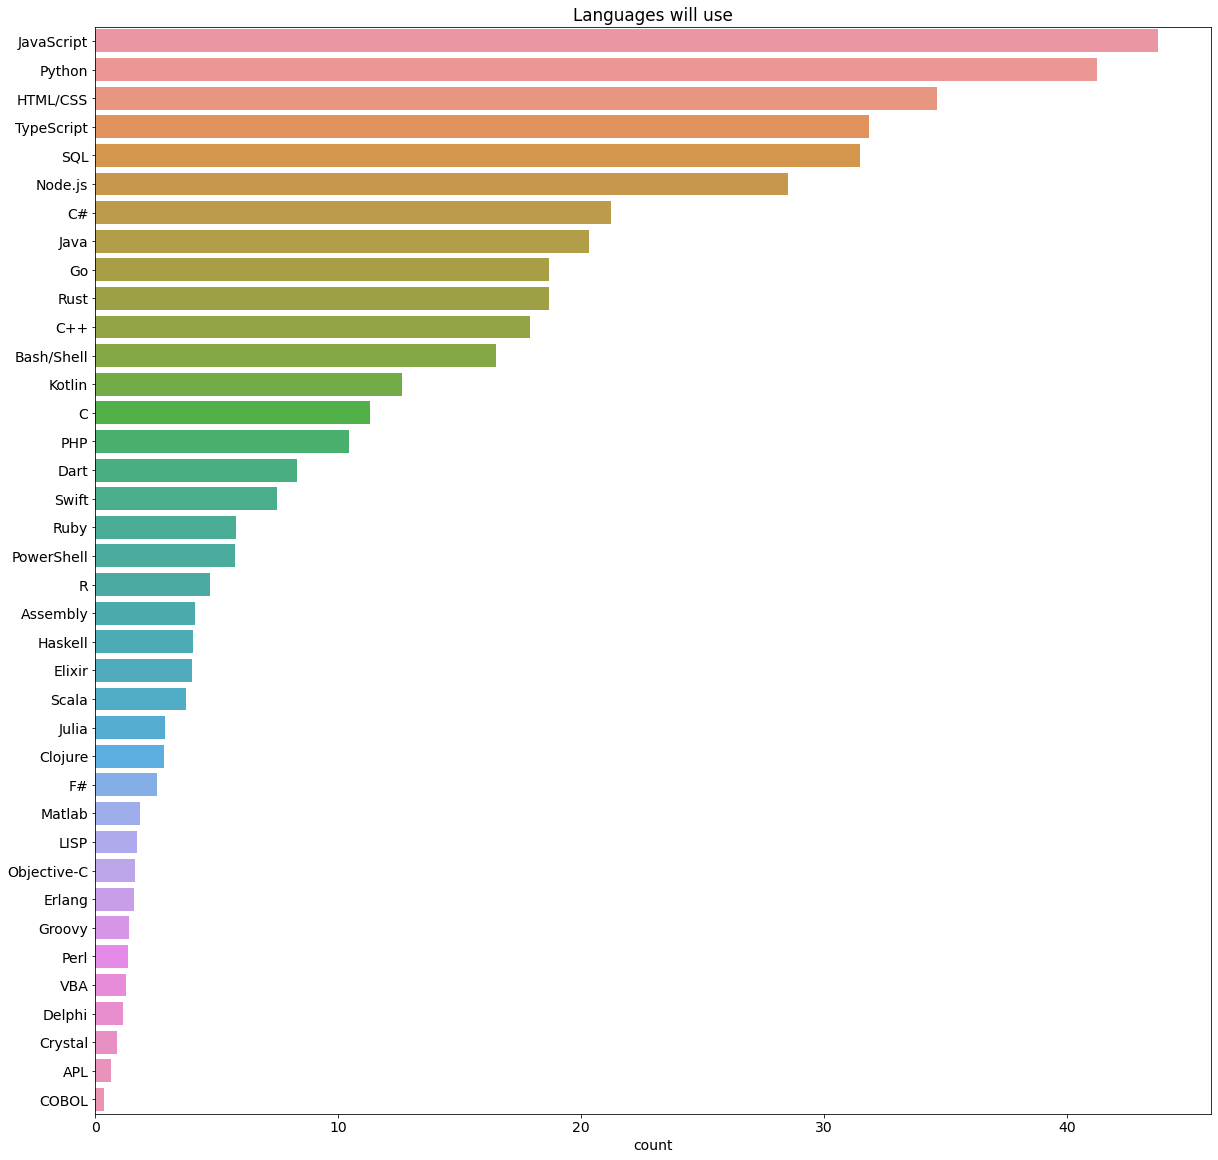

In [33]:
plt.figure(figsize=(20, 20))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages will use");
plt.xlabel('count');

What are the most popular *Databases* in 2021?

In [34]:
Database_worked_df = split_multicolumn(df.DatabaseHaveWorkedWith)
pct_Database_worked_df = Database_worked_df.mean().sort_values(ascending=False)*100
pct_Database_worked_df

MySQL                   41.739474
PostgreSQL              33.610182
SQLite                  26.686561
MongoDB                 23.059960
Microsoft SQL Server    22.363643
Redis                   17.240140
MariaDB                 14.240343
Firebase                13.508072
Elasticsearch           11.030813
Oracle                  10.501085
DynamoDB                 6.078692
Cassandra                2.190822
IBM DB2                  1.688659
Couchbase                1.295557
dtype: float64

In [35]:
df_top_databases = Database_worked_df.sum().sort_values(ascending=False)
df_top_databases

MySQL                   34827
PostgreSQL              28044
SQLite                  22267
MongoDB                 19241
Microsoft SQL Server    18660
Redis                   14385
MariaDB                 11882
Firebase                11271
Elasticsearch            9204
Oracle                   8762
DynamoDB                 5072
Cassandra                1828
IBM DB2                  1409
Couchbase                1081
dtype: int64

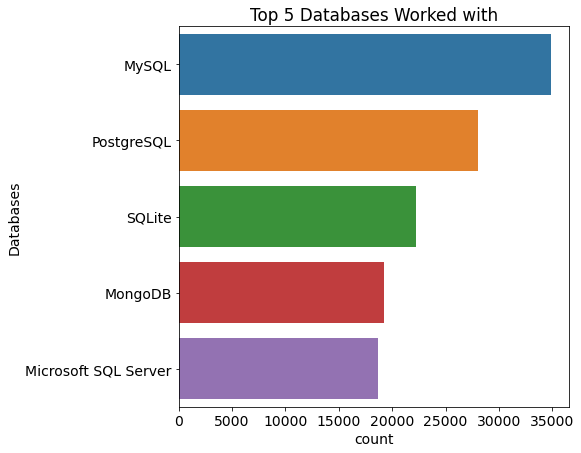

In [36]:
plt.figure(figsize=(7, 7))
sns.barplot(x=df_top_databases[:5], y=df_top_databases[:5].index)
plt.title("Top 5 Databases Worked with");
plt.ylabel("Databases");
plt.xlabel('count');

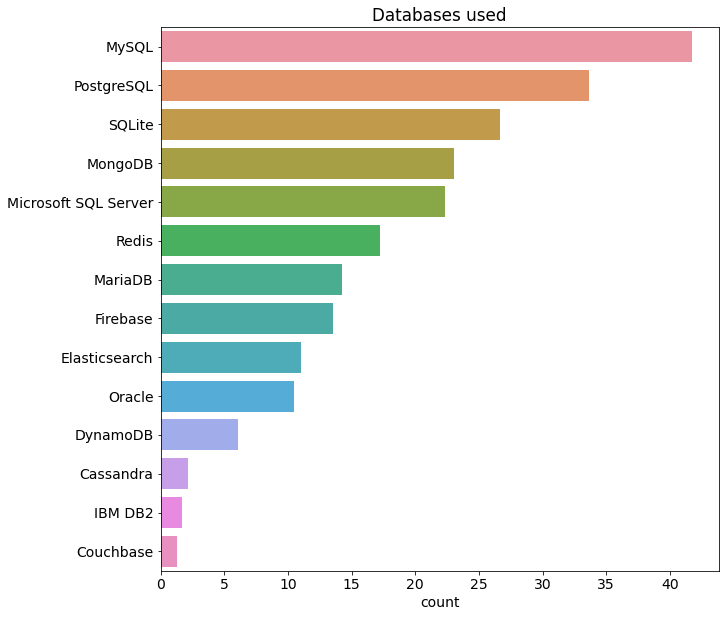

In [37]:
plt.figure(figsize=(10, 10))
sns.barplot(x=pct_Database_worked_df, y=pct_Database_worked_df.index)
plt.title("Databases used");
plt.xlabel('count');

Which Databases are the most people interested to learn over the next year?

In [38]:
Database_interested_df = split_multicolumn(df.DatabaseWantToWorkWith)
pct_Database_interested_df = Database_interested_df.mean().sort_values(ascending=False)*100
pct_Database_interested_df

PostgreSQL              32.060547
MySQL                   24.066683
MongoDB                 23.865339
Redis                   20.416112
SQLite                  18.146191
Elasticsearch           13.805295
Microsoft SQL Server    13.500881
Firebase                12.780594
MariaDB                  9.622599
DynamoDB                 7.170508
Oracle                   5.390765
Cassandra                5.009648
Couchbase                1.973897
IBM DB2                  0.789799
dtype: float64

In [39]:
df_databases_to_learn = Database_interested_df.sum().sort_values(ascending=False)
df_databases_to_learn

PostgreSQL              26751
MySQL                   20081
MongoDB                 19913
Redis                   17035
SQLite                  15141
Elasticsearch           11519
Microsoft SQL Server    11265
Firebase                10664
MariaDB                  8029
DynamoDB                 5983
Oracle                   4498
Cassandra                4180
Couchbase                1647
IBM DB2                   659
dtype: int64

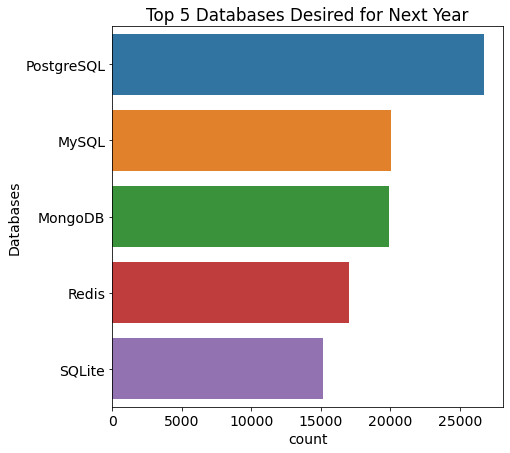

In [40]:
plt.figure(figsize=(7, 7))
sns.barplot(x=df_databases_to_learn[:5], y=df_databases_to_learn[:5].index)
plt.title("Top 5 Databases Desired for Next Year");
plt.ylabel("Databases");
plt.xlabel('count');

What are the most popular *Platform* in 2021?

In [41]:
Platform_worked_df = split_multicolumn(df.PlatformHaveWorkedWith)
pct_Platform_worked_df = Platform_worked_df.mean().sort_values(ascending=False)*100
pct_Platform_worked_df

AWS                            34.511439
Google Cloud Platform          19.760544
Microsoft Azure                19.569985
Heroku                         15.247067
DigitalOcean                   11.205791
IBM Cloud or Watson             1.602368
Oracle Cloud Infrastructure     1.174511
dtype: float64

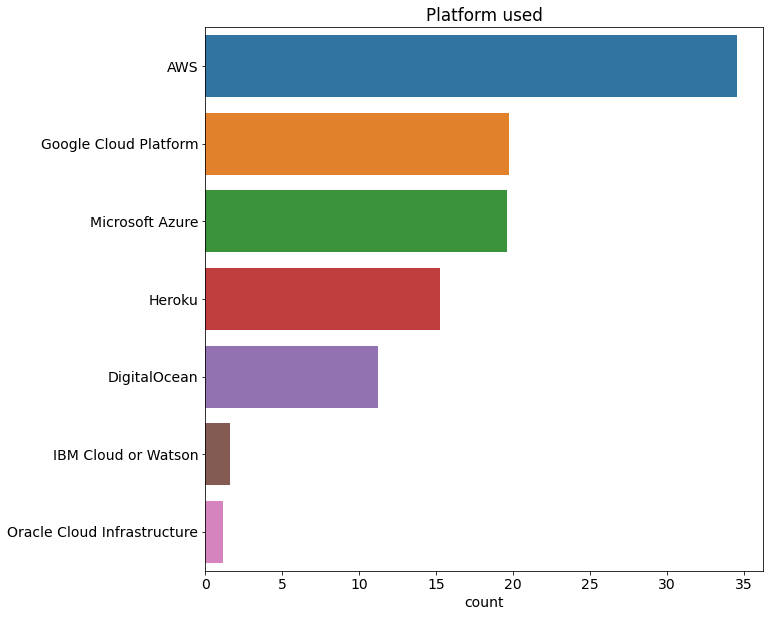

In [42]:
plt.figure(figsize=(10, 10))
sns.barplot(x=pct_Platform_worked_df, y=pct_Platform_worked_df.index)
plt.title("Platform used");
plt.xlabel('count');

As we can see above that `AWS` is the most used Platform.